In [17]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical

sns.set(style='whitegrid')

In [18]:
# Load the dataset
X = np.load("dataset/X.npy")
y = np.load("dataset/Y.npy")

print("Data loaded successfully")
print(f"Shape of X: {X.shape} (Num Samples, 64, 64)")
print(f"Shape of y: {y.shape} (Num Samples, Classes One-Hot)")

Data loaded successfully
Shape of X: (2062, 64, 64) (Num Samples, 64, 64)
Shape of y: (2062, 10) (Num Samples, Classes One-Hot)


In [19]:
# Convert labels from one-hot to class integers
y = np.argmax(y, axis=1)

# Normalize pixel values to [0, 1]
X = X / 255.0

# Reshape X for CNN (add channel dimension)
X = X.reshape(-1, 64, 64, 1)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [22]:
# Visualize sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_cat[i])}")
    plt.axis('off')
plt.suptitle("Sample Sign Language Digits", fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
# Define CNN model
model = Sequential([
    Input(shape=(64, 64, 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [24]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.2178 - loss: 3.0768 - val_accuracy: 0.1061 - val_loss: 2.3025
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.5320 - loss: 1.3229 - val_accuracy: 0.1061 - val_loss: 2.3073
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.7434 - loss: 0.7679 - val_accuracy: 0.1061 - val_loss: 2.3329
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.8006 - loss: 0.5928 - val_accuracy: 0.1061 - val_loss: 2.3700
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.8269 - loss: 0.4710 - val_accuracy: 0.1061 - val_loss: 2.4140
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.8850 - loss: 0.3344 - val_accuracy: 0.1061 - val_loss: 2.4759
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.9217 - loss: 0.2582 - val_accuracy: 0.1061 - val_loss: 2.5516
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.9095 - loss: 0.2461 - val_accuracy: 0.

In [26]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 13.08%
Test Loss: 3.9145


In [27]:
# Predict and analyze
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.10      1.00      0.19        41
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00        42
           7       0.62      0.32      0.42        41
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00        42

    accuracy                           0.13       413
   macro avg       0.07      0.13      0.06       413
weighted avg       0.07      0.13      0.06       413



In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [30]:
# Plot training history
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

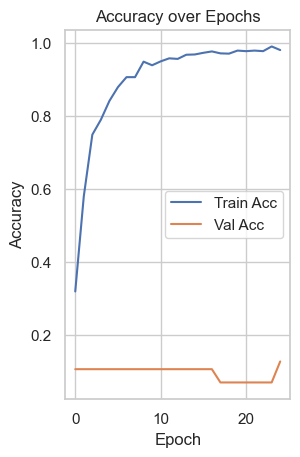

In [31]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [32]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()